In [ ]:
import pandas as pd
import numpy as np

# 방문 정보
df_place = pd.read_csv('./data/training/csv/tn_visit_area_info_방문지정보_A.csv')
df_place.head(5)

# 여행 정보
df_travel = pd.read_csv('./data/training/csv/tn_travel_여행_A.csv')
df_travel.head(5)

# 여행객 정보
df_traveler = pd.read_csv('./data/training/csv/tn_traveller_master_여행객 Master_A.csv')
df_traveler.head(5)

df = pd.merge(df_place, df_travel, on='TRAVEL_ID', how='left') # on TRAVEL_ID 주의
df = pd.merge(df, df_traveler, on='TRAVELER_ID', how='left') # on TRAVELER_ID 주의

df.head(5)

df.info()

# 'TRAVEL_MISSION_CHECK' 컬럼에서 결측치가 아닌 행만 필터링
df_filter = df[~df['TRAVEL_MISSION_CHECK'].isnull()].copy()

# TRAVEL_MISSION_CHECK 컬럼에서 ';'로 구분된 첫 번째 값을 정수형으로 변환하여 새로운 컬럼 생성
df_filter.loc[:, 'TRAVEL_MISSION_INT'] = df_filter['TRAVEL_MISSION_CHECK'].str.split(';').str[0].astype(int)

# VISIT_AREA_NM이 '집'인 행 제거
df = df[df['VISIT_AREA_NM'] != '집']

# VISIT_AREA_NM이 '친구/친지집'인 행 제거
df = df[df['VISIT_AREA_NM'] != '친구/친지집']

# VISIT_AREA_NM이 '숙소'인 행 제거
df = df[df['VISIT_AREA_NM'] != '숙소']

# 공백문자("") 를 NaN 으로 치환
#df = df.replace(r'^\s*$', np.nan, regex=True)

# 결측치가 있는 행 제거
#df = df.dropna()

df_filter

df.to_csv('./merged_data.csv', index=False, encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30154 entries, 0 to 30153
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   VISIT_AREA_ID              30154 non-null  int64  
 1   TRAVEL_ID                  30154 non-null  object 
 2   VISIT_ORDER                30154 non-null  int64  
 3   VISIT_AREA_NM              30154 non-null  object 
 4   VISIT_START_YMD            30154 non-null  object 
 5   VISIT_END_YMD              30154 non-null  object 
 6   ROAD_NM_ADDR               20381 non-null  object 
 7   LOTNO_ADDR                 21859 non-null  object 
 8   X_COORD                    22821 non-null  float64
 9   Y_COORD                    22821 non-null  float64
 10  ROAD_NM_CD                 24 non-null     float64
 11  LOTNO_CD                   2433 non-null   object 
 12  POI_ID                     13872 non-null  object 
 13  POI_NM                     13872 non-null  obj

In [16]:
import pandas as pd
import numpy as np

# 데이터 로드
df_place = pd.read_csv('./test.csv')

# 분석할 핵심 컬럼
core_columns = [
    'VISIT_AREA_NM', 'ROAD_NM_ADDR', 'GENDER', 'TRAVEL_STATUS_ACCOMPANY'
]

# 공백을 NaN으로 치환
for col in core_columns:
    df_place[col] = df_place[col].replace(r'^\s*$', np.nan, regex=True)

# VISIT_AREA_NM 이 '집' 제거
df_place = df_place[df_place['VISIT_AREA_NM'] != '집']

# 핵심 컬럼만 결측값 제거
df_place = df_place.dropna(subset=core_columns)

# Unnamed 컬럼 제거 (엑셀 불러올 때 종종 생김)
df_place = df_place.loc[:, ~df_place.columns.str.contains('^Unnamed')]

# 저장
df_place.to_csv('./test2.csv', index=False, encoding='utf-8-sig')

print(df_place)


       TRAVEL_ID  VISIT_AREA_NM         ROAD_NM_ADDR GENDER  AGE_GRP  \
0      a_a015688         프로방스마을   경기 파주시 탄현면 새오리로 77      남     30.0   
1      a_a004293        병점역 1호선       경기 화성시 떡전골로 97      여     40.0   
2      a_a000491          더현대서울     서울 영등포구 여의대로 108      여     30.0   
3      a_a000172         강릉중앙시장        강원 강릉시 금성로 21      남     30.0   
5      a_a005474        새절역 6호선    서울 은평구 증산로 지하 400      남     40.0   
...          ...            ...                  ...    ...      ...   
24462  c_c005343       한복남 경복궁점     서울 종로구 사직로 133-5      여     20.0   
24466  a_a001505         카페아쁠뤼스  경기 가평군 청평면 신청평로 107      여     30.0   
24467  a_a013660        국립중앙박물관      서울 용산구 서빙고로 137      남     20.0   
24468  a_a000019       송도달빛축제공원      인천 연수구 센트럴로 350      남     20.0   
24469  a_a000567  콩카페 롯데백화점 잠실점      서울 송파구 올림픽로 240      여     20.0   

      TRAVEL_STATUS_ACCOMPANY  
0                      나홀로 여행  
1                      나홀로 여행  
2                    2인 가족 여행  
3      

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/merged_travel_jeju_data.csv', encoding='utf-8')

# 방문지별 여행자 수 집계
visit_counts = df['VISIT_AREA_NM'].value_counts()
print(visit_counts.head(10))

VISIT_AREA_NM
집              4485
제주 국제공항        2204
김포국제공항 국내선      958
제주동문시장          655
서귀포 매일 올레시장     572
함덕해수욕장          412
협재해수욕장          323
오설록 티 뮤지엄       307
성산일출봉           236
청주국제공항          212
Name: count, dtype: int64


In [2]:
# 성별/연령대별 활동 유형 분포
activity_by_gender_age = df.groupby(['GENDER', 'AGE_GRP', 'ACTIVITY_TYPE_CD']).size().reset_index(name='count')
print(activity_by_gender_age)

   GENDER  AGE_GRP  ACTIVITY_TYPE_CD  count
0       남       20               1.0   2000
1       남       20               2.0    800
2       남       20               3.0    565
3       남       20               4.0   1044
4       남       20               5.0   1145
..    ...      ...               ...    ...
74      여       60               3.0     91
75      여       60               4.0    146
76      여       60               5.0    138
77      여       60               6.0     17
78      여       60               7.0     46

[79 rows x 4 columns]


In [3]:
# 여행 스타일 평균을 방문지별로 집계
style_cols = [f'TRAVEL_STYL_{i}' for i in range(1,9)]
style_means = df.groupby('VISIT_AREA_NM')[style_cols].mean()
print(style_means)

                      TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_STYL_3  \
VISIT_AREA_NM                                                       
(재단) 인천 교구 천주교회 유지재단       1.000000       6.000000       1.000000   
(주) 제주는 랑 제주고씨네            2.000000       1.000000       4.000000   
0415카페                     3.500000       3.500000       1.500000   
1004뮤지엄파크                  3.333333       2.666667       2.666667   
10전비                       4.000000       2.000000       2.000000   
...                             ...            ...            ...   
힐튼 가든인 서울 강남점 조식 뷔페        1.000000       1.000000       1.000000   
힐하우스펜션                     2.000000       1.000000       1.000000   
힘센 장어                      5.000000       2.000000       3.000000   
힘찬 약국                      2.000000       6.000000       5.000000   
힙한식                        4.000000       2.000000       4.000000   

                      TRAVEL_STYL_4  TRAVEL_STYL_5  TRAVEL_STYL_6  \
VISIT_AREA_NM                    

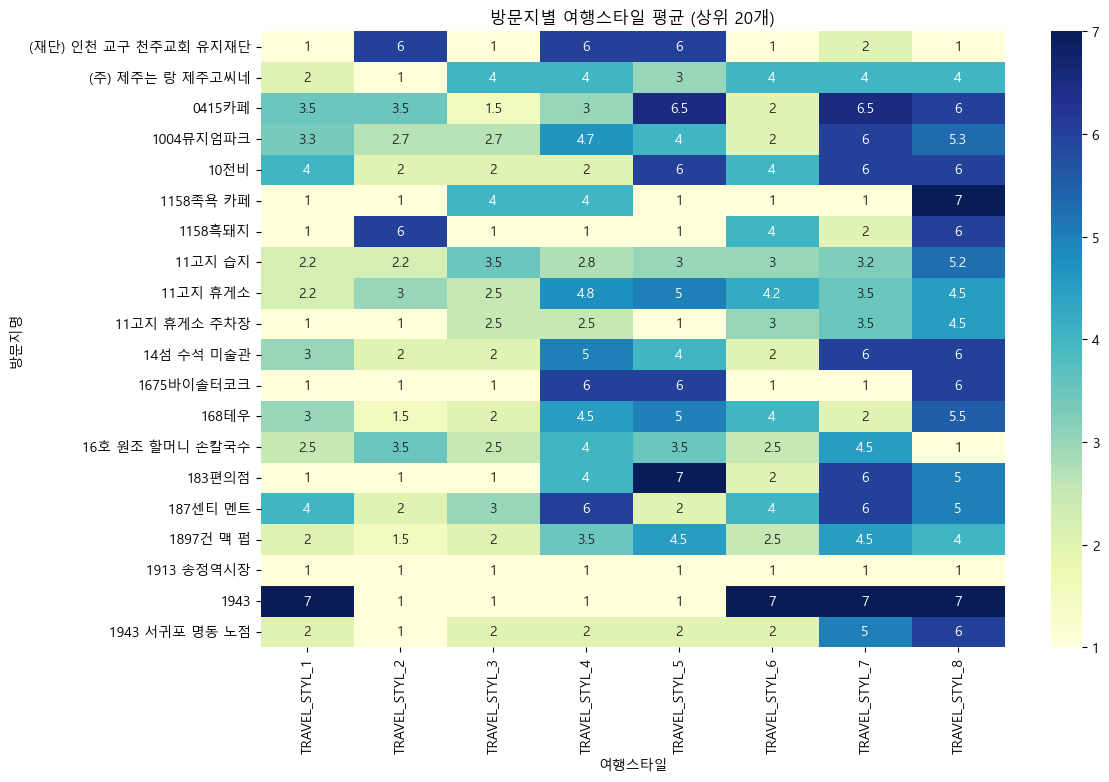

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 관광지/음식점/숙박지마다 여행스타일이 다를 것이다

# style_means: VISIT_AREA_NM 을 index로, travel_style_1~8 컬럼이 평균
style_means = df.groupby('VISIT_AREA_NM')[
    [f'TRAVEL_STYL_{i}' for i in range(1,9)]
].mean()

# 너무 많으면 상위 20개만
top_places = style_means.head(20)

plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(12, 8))
sns.heatmap(top_places, annot=True, cmap='YlGnBu')
plt.title("방문지별 여행스타일 평균 (상위 20개)")
plt.xlabel("여행스타일")
plt.ylabel("방문지명")
plt.show()

In [11]:
import pandas as pd

df = pd.read_csv('./data/merged_travel_jeju_data.csv', encoding='utf-8')

# AGE_GRP가 숫자형이라면 문자열 '20대', '30대' 등으로 변환 (선택 사항)
df['AGE_GRP'] = df['AGE_GRP'].astype(str) + '대'

# 방문지별, 나이대별, 성별별 여행자 수 집계
grouped = df.groupby(['VISIT_AREA_NM', 'AGE_GRP', 'GENDER']).size().reset_index(name='COUNT')

print(grouped.head(10))


          VISIT_AREA_NM AGE_GRP GENDER  COUNT
0  (재단) 인천 교구 천주교회 유지재단     50대      남      1
1       (주) 제주는 랑 제주고씨네     30대      남      1
2                0415카페     20대      여      1
3                0415카페     40대      여      1
4             1004뮤지엄파크     40대      여      6
5                  10전비     30대      여      1
6             1158족욕 카페     30대      여      1
7               1158흑돼지     40대      여      1
8               11고지 습지     20대      여      1
9               11고지 습지     30대      여      1


In [13]:
# 방문지별 전체 여행자 수 집계 후 상위 5개 선정
top_places = df['VISIT_AREA_NM'].value_counts().head(5).index.tolist()

# 상위 방문지만 필터링
filtered = grouped[grouped['VISIT_AREA_NM'].isin(top_places)]

# 피벗 테이블 생성 : index=VISIT_AREA_NM, columns=(AGE_GRP, GENDER), values=COUNT
pivot_df = filtered.pivot_table(index='VISIT_AREA_NM',
                                columns=['AGE_GRP', 'GENDER'],
                                values='COUNT',
                                fill_value=0)

print(pivot_df)


AGE_GRP          20대           30대           40대           50대          60대  \
GENDER             남      여      남      여      남      여      남      여     남   
VISIT_AREA_NM                                                                 
김포국제공항 국내선     145.0  265.0  149.0  191.0   38.0   86.0   36.0   37.0   6.0   
서귀포 매일 올레시장     71.0  145.0   88.0  113.0   32.0   51.0   18.0   49.0   1.0   
제주 국제공항        305.0  596.0  316.0  448.0  100.0  223.0   72.0  123.0   3.0   
제주동문시장          99.0  243.0   73.0  174.0   18.0   15.0    8.0   22.0   0.0   
집              499.0  897.0  560.0  902.0  344.0  577.0  265.0  351.0  34.0   

AGE_GRP              
GENDER            여  
VISIT_AREA_NM        
김포국제공항 국내선      5.0  
서귀포 매일 올레시장     4.0  
제주 국제공항        18.0  
제주동문시장          3.0  
집              56.0  


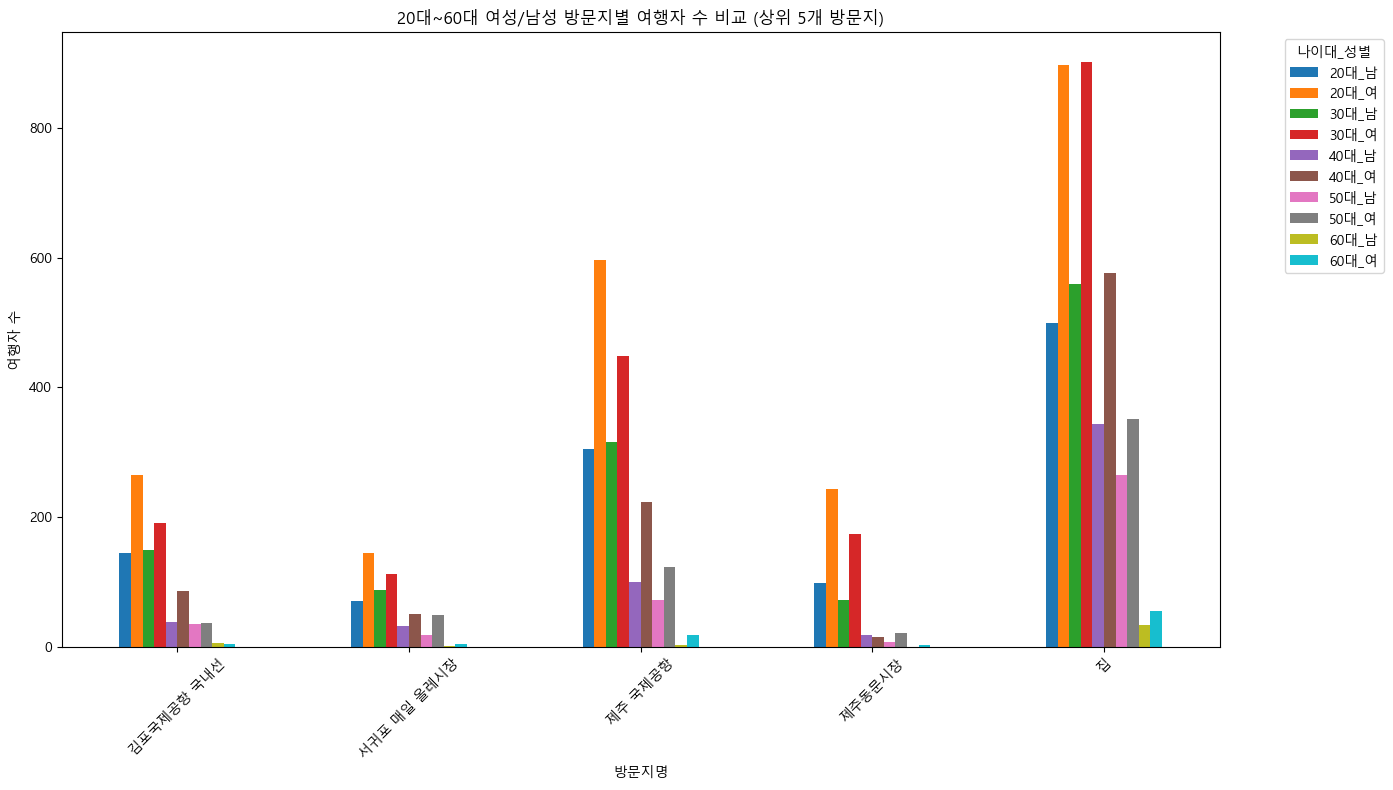

In [14]:
import matplotlib.pyplot as plt

# 컬럼 다중 인덱스 풀기
pivot_df.columns = ['_'.join(col) for col in pivot_df.columns]

# 그래프 출력
pivot_df.plot(kind='bar', figsize=(14, 8))

plt.title('20대~60대 여성/남성 방문지별 여행자 수 비교 (상위 5개 방문지)')
plt.ylabel('여행자 수')
plt.xlabel('방문지명')
plt.xticks(rotation=45)
plt.legend(title='나이대_성별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
import matplotlib.pyplot as plt

# 컬럼 다중 인덱스 풀기
pivot_df.columns = ['_'.join(col) for col in pivot_df.columns]

# 그래프 출력
pivot_df = grouped.pivot_table(index='VISIT_AREA_NM',
                               columns=['AGE_GRP', 'GENDER'],
                               values='COUNT',
                               fill_value=0)

pivot_df.columns = ['_'.join(col) for col in pivot_df.columns]
pivot_df.plot(kind='bar', figsize=(20, 10))  # 그래프 크기 키워서 가독성 향상 권장

plt.title('20대~60대 여성/남성 방문지별 여행자 수 비교 (모든 방문지)')
plt.ylabel('여행자 수')
plt.xlabel('방문지명')
plt.xticks(rotation=90)  # 방문지명이 많으니 90도로 세우기 권장
plt.legend(title='나이대_성별', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Unexpected exception formatting exception. Falling back to standard exception
Error in callback <function _draw_all_if_interactive at 0x0000026580D9D550> (for post_execute), with arguments args (),kwargs {}:
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_8260\2567371018.py", line 13, in <module>
    pivot_df.plot(kind='bar', figsize=(20, 10))  # 그래프 크기 키워서 가독성 향상 권장
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_core.py", line 1030, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\__init__.py", line 71, in plot
    plot_obj.generate()
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py", line 501, in generate
    self._make_plot(fig)
  File "c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\co

MemoryError: In RendererAgg: Out of memory

<Figure size 2000x1000 with 1 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report

# 카테고리 인코딩
df['GENDER_enc'] = LabelEncoder().fit_transform(df['GENDER'])
df['AGE_GRP_enc'] = LabelEncoder().fit_transform(df['AGE_GRP'])
df['VISIT_AREA_enc'] = LabelEncoder().fit_transform(df['VISIT_AREA_NM'])

features = ['GENDER_enc', 'AGE_GRP_enc'] + [f'TRAVEL_STYL_{i}' for i in range(1,9)]
X = df[features]
y = df['VISIT_AREA_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

MemoryError: Unable to allocate 1.17 GiB for an array with shape (12003, 1, 13028) and data type float64

In [6]:
import pandas as pd
from joblib import load

# 1. 모델 & LabelEncoder 불러오기
loaded_model = load("./resources/travel_rf_model.joblib")
le = load("./resources/travel_label_encoder.joblib")

# 2. 사용자 입력 데이터 (예: 20대 남성, 활동코드 3)
test_input = pd.DataFrame([{
    "GENDER": 1,
    "AGE_GRP": 20,
    "ACTIVITY_TYPE_CD": 3
}])

# 3. 확률 예측
probas = loaded_model.predict_proba(test_input)[0]

# 4. 상위 10개 인덱스 추출
top10_indices = probas.argsort()[::-1][:10]

# 5. 인덱스를 실제 여행지 이름으로 변환
top10_places = le.inverse_transform(top10_indices)

# 6. 출력
print("🎯 추천 여행지 TOP 10")
for rank, place in enumerate(top10_places, 1):
    print(f"{rank}. {place}")

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


🎯 추천 여행지 TOP 10
1. 동궁과 월지
2. 대릉원
3. 아쿠아플라넷 여수
4. 경기전
5. 비밀의 숲
6. 9.81파크
7. 죽녹원
8. 성산일출봉
9. 천지연폭포
10. 캐리비안베이


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
